<a href="https://colab.research.google.com/github/amanraj2000/Bank_Customer_Retention_Prediction_System/blob/main/Prediction_System_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Retention Predicition System**

---



---


###  **Churning Dataset**

In [10]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


## **Importing Libraries**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.0


In [18]:
!pip install -q keras

## **Importing the Dataset**

In [38]:

bank_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling_datset.csv")
x = bank_data.iloc[:, 3:13]
y = bank_data.iloc[:, 13]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [39]:
# Creating dummy variables
geography = pd.get_dummies(x["Geography"] , drop_first = True)
gender = pd.get_dummies(x["Gender"] , drop_first = True)



# Concatenate the Data Frames
x = pd.concat([x , geography , gender] , axis = 1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
# Dropping unneccessary columns

x = x.drop(["Geography" , "Gender"] , axis = 1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


## **Dataset preparation**

In [44]:
# Splitting dataset into Training and Testing data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
x_train 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,Spain,Female,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,Germany,Male,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,France,Female,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,Spain,Male,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,Spain,Female,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,594,Germany,Female,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,Spain,Female,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,France,Male,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,Spain,Female,38,9,0.00,2,1,1,148750.16,0,1,0


In [45]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

## **Model Architecture**

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Intialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform' , activation = 'relu' , input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform' , activation= 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform' , activation= 'relu'))

# Adding the fourth layer i.e. Output Layer
classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation= 'sigmoid'))

# Compiling the ANN model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics= ['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(x_train, y_train, validation_split=0.33 , batch_size=10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5160 - accuracy: 0.7712 - val_loss: 0.4712 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4543 - accuracy: 0.7955 - val_loss: 0.4530 - val_accuracy: 0.7914
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8001 - val_loss: 0.4372 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8093 - val_loss: 0.4185 - val_accuracy: 0.8061
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8158 - val_loss: 0.4025 - val_accuracy: 0.8129
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.8194 - val_loss: 0.3953 - val_accuracy: 0.8152
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8201 - val_loss: 0.3925 - val_accuracy: 0.8133

## **Model Evaluation**

In [35]:
# Making Predictions and evaluating the model

# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[1493,  102],
       [ 185,  220]])

### **Accuracy**

In [36]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8565

### **Result Plots**








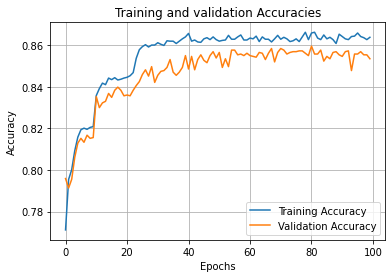

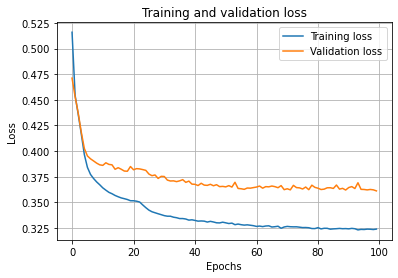

In [56]:
# summarize history for accuracy
plt.grid()

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Training and validation Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

# summarize history for loss
plt.grid()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()